In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading data to a pandas dataframe
df = pd.read_csv('phishing.csv')

In [3]:
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [4]:
df.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [5]:
#Number of Rows and Columns
df.shape

(11054, 32)

In [6]:
#Checking for Null values
df.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split,cross_val_score

In [8]:
#Seperating Data
X = df.drop(columns=['class', 'Index'])
X.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
3,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,1,-1,1,-1,-1


In [9]:
#Seperating Labels
Y=df['class']
Y=pd.DataFrame(Y)
Y.head()

,class
0,-1
1,-1
2,-1
3,1
4,1


In [10]:
#Finding the correlation matrix
corr_matrix = df.corr()
corr_matrix['class']

Index                  0.000802
UsingIP                0.094033
LongURL                0.057661
ShortURL              -0.067931
Symbol@                0.052994
Redirecting//         -0.038885
PrefixSuffix-          0.348588
SubDomains             0.298231
HTTPS                  0.714704
DomainRegLen          -0.225879
Favicon               -0.000231
NonStdPort             0.036461
HTTPSDomainURL        -0.040096
RequestURL             0.253478
AnchorURL              0.692895
LinksInScriptTags      0.248415
ServerFormHandler      0.221380
InfoEmail              0.018039
AbnormalURL           -0.060751
WebsiteForwarding     -0.020151
StatusBarCust          0.041878
DisableRightClick      0.012675
UsingPopupWindow       0.000136
IframeRedirection     -0.003362
AgeofDomain            0.121402
DNSRecording           0.075579
WebsiteTraffic         0.346003
PageRank               0.104593
GoogleIndex            0.129000
LinksPointingToPage    0.032694
StatsReport            0.079632
class   

In [11]:
status_corr = corr_matrix['class']
status_corr.shape

(32,)

In [12]:
def feature_selector_correlation(cmatrix, threshold):
    
    selected_features = []
    feature_score = []
    i=0
    for score in cmatrix:
        if abs(score)>threshold:
            selected_features.append(cmatrix.index[i])
            feature_score.append( ['{:3f}'.format(score)])
        i+=1
    result = list(zip(selected_features,feature_score)) 
    return result

In [13]:
features_selected = feature_selector_correlation(status_corr, 0.2)
features_selected

[('PrefixSuffix-', ['0.348588']),
 ('SubDomains', ['0.298231']),
 ('HTTPS', ['0.714704']),
 ('DomainRegLen', ['-0.225879']),
 ('RequestURL', ['0.253478']),
 ('AnchorURL', ['0.692895']),
 ('LinksInScriptTags', ['0.248415']),
 ('ServerFormHandler', ['0.221380']),
 ('WebsiteTraffic', ['0.346003']),
 ('class', ['1.000000'])]

In [14]:
selected_features = [i for (i,j) in features_selected if i != 'class']
selected_features

['PrefixSuffix-',
 'SubDomains',
 'HTTPS',
 'DomainRegLen',
 'RequestURL',
 'AnchorURL',
 'LinksInScriptTags',
 'ServerFormHandler',
 'WebsiteTraffic']

In [15]:
def feature_selector_correlation(cmatrix, threshold):
    
    selected_features = []
    feature_score = []
    i=0
    for score in cmatrix:
        if abs(score)>threshold:
            selected_features.append(cmatrix.index[i])
            feature_score.append( ['{:3f}'.format(score)])
        i+=1
    result = list(zip(selected_features,feature_score)) 
    return result

Training and Testing Dataset Spliting using the train_test_split

In [16]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)

In [17]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(7737, 30)
(3317, 30)
(7737, 1)
(3317, 1)


Using Different Algorithms To Find The Suitable Algorithm For The Model
1. Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [19]:
logreg=LogisticRegression()
model_1=logreg.fit(train_X,train_Y)

C:\Users\chaww\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
logreg_predict= model_1.predict(test_X)

In [21]:
accuracy_score(logreg_predict,test_Y)

0.9240277359059391

In [22]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.89      0.93      0.91      1400
           1       0.95      0.92      0.93      1917

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



2. Decision Tree Classifier Algorithm

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtree=DecisionTreeClassifier()
model_3=dtree.fit(train_X,train_Y)

In [25]:
dtree_predict=model_3.predict(test_X)

In [26]:
accuracy_score(dtree_predict,test_Y)

0.963521254145312

In [27]:
print(classification_report(dtree_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.95      0.96      0.96      1441
           1       0.97      0.96      0.97      1876

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



3. Random Forest Classifier Algorithm

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model_4=rfc.fit(train_X,train_Y)

C:\Users\chaww\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [29]:
rfc_predict=model_4.predict(test_X)

In [30]:
accuracy_score(rfc_predict,test_Y)

0.9737714802532409

In [31]:
print(classification_report(rfc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.96      0.98      0.97      1427
           1       0.98      0.97      0.98      1890

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



From those three algorithms Random Forest has the best ovarall accuracy

In [32]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

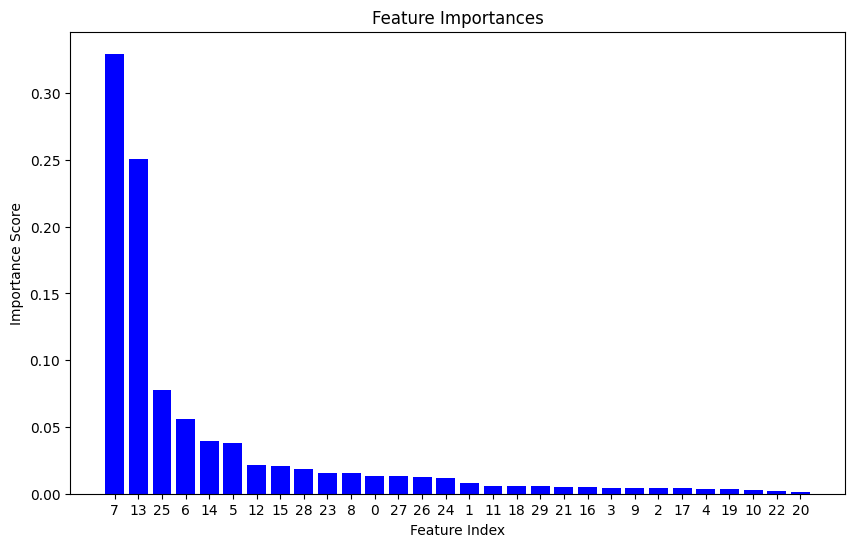

In [33]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.show()

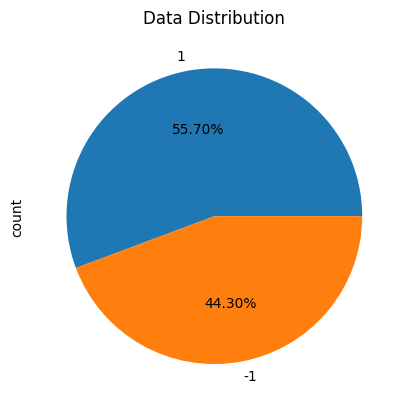

In [34]:
df['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Data Distribution")
plt.show()

In [35]:
X

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
3,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,1,-1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,-1,1,1,-1,-1,1,1,1
11050,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,1,-1,1,1,1,1,1,1,-1,1
11051,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,1,-1,1,0,1
11052,-1,-1,1,1,1,-1,-1,-1,1,-1,...,1,-1,1,1,1,1,-1,1,1,1


In [42]:
input_data = (1, 1, 1, 1, 1, 1, 0, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1)

#Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_4.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
 print('This is a legitamate site')
else:
 print('This is a phishing site')

[1]
This is a legitamate site


C:\Users\chaww\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [37]:
import pickle
pickle.dump(rfc,open("model.pkl", "wb"))

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect =TfidfVectorizer()

In [39]:
pickle.dump(vect, open('vector.pkl','wb'))

In [40]:
vector_form=pickle.load(open('vector.pkl','rb'))

In [41]:
load_model=pickle.load(open('model.pkl','rb'))